# Viisualizations_COVID

## Content
- [GENERAL](#GENERAL)
- [MUESTRAS](#MUESTRAS)

## Goal of visualization

## TODOs:
- Check the joins between all tables
- Look redshift
- look spark
- Save to S3
- Bash for aws cp


## Summary about  each dataset


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
import re
from sodapy import Socrata

#'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
#'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel',
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

idx_pd = pd.IndexSlice

### GENERAL
[Volver](#Exploring_COVID)

**Columns:**
- **'fecha_de_notificaci_n:'** Fecha de notificación de resultado positivo
- **'c_digo_divipola:'** Codigo DIVIPOLA (usado para hacer join luego con el censo)
- **'ciudad_de_ubicaci_n:'** Ciudad de Ubicación
- **'departamento:'** Departamento
- **'atenci_n:'** Tipo de atención
- **'edad:'** Edad de la persona
- **'sexo:'** Sexo
- **'tipo:'** Tipo
- **'estado:'** Estado de salud de la persona
- **'pa_s_de_procedencia:'** País de procedencia
- **'fis:'** Fecha Inicio de Sintomas
- **'fecha_diagnostico:'** Fecha de diagnostico
- **'fecha_recuperado:'** Fecha de recuperación
- **'fecha_reporte_web:'** Fecha de reporte en la Web
- **'tipo_recuperaci_n:'** Tipo de recuperación
- **'codigo_departamento:'** Codigo del departamento
- **'codigo_pais:'** Codigo del pais
- **'pertenencia_etnica:'** Pertenencia etnica
- **'nombre_grupo_etnico:'** Nombre grup etnico
- **'fecha_de_muerte:'** Fecha de muerte

**Preprocessing**
- Set index id_de_caso
- Create new column for "Asintomatico"
- Change dtypes of columns (Dates, ints, strings)
- Get DIVIPOLA codefor department and city.

In [26]:
client = Socrata("www.datos.gov.co", None)
results = client.get("gt2j-8ykr", limit=1000000)
df = pd.DataFrame.from_records(results)

In [27]:
df = df.set_index("id_de_caso", drop=True)

In [28]:
df["Asintomatico"] = (df["fis"]=="Asintomático").astype(int)

In [29]:
df.loc[df["fis"]=="Asintomático", "fis"] = np.nan

In [30]:
df = df.astype({'fecha_de_notificaci_n': np.datetime64,
                'c_digo_divipola': str,
                'ciudad_de_ubicaci_n': str,
                'departamento': str,
                'atenci_n': str,
                'edad': np.int64,
                'sexo': str,
                'tipo': str,
                'estado': str,
                'pa_s_de_procedencia': str,
                'fis': np.datetime64,
                'fecha_diagnostico': np.datetime64,
                'fecha_recuperado': np.datetime64,
                'fecha_reporte_web': np.datetime64,
                'tipo_recuperaci_n': str,
                "codigo_departamento": str,
                "codigo_pais": str,
                "pertenencia_etnica": str,
                'fecha_de_muerte': np.datetime64})

In [31]:
df["divipola_dpto"] = df["c_digo_divipola"].str[:2].astype(int)
df["divipola_mpio"] = df["c_digo_divipola"].str[2:].astype(int)

In [32]:
df.head()

,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,Asintomatico,divipola_dpto,divipola_mpio
id_de_caso,,,,,,,,,,,,,,,,,,,,,,,
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NaN,NaT,0,11,1
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NaN,NaT,0,76,111
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NaN,NaT,0,5,1
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,nan,2020-03-06,2020-03-11,2020-03-26,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,nan,2020-03-08,2020-03-11,2020-03-23,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1


In [33]:
df["rango_edad"] = pd.cut(df["edad"], np.arange(0, 110, 10))

In [34]:
df["rango_edad"] = df["rango_edad"].astype(str)

In [35]:
total_por_rango_de_edad = df.groupby(["rango_edad"])["estado"].agg(["count"])

In [36]:
total_por_rango_de_edad

,count
rango_edad,
"(0.0, 10.0]",5691
"(10.0, 20.0]",11866
"(20.0, 30.0]",34778
"(30.0, 40.0]",34245
"(40.0, 50.0]",23147
"(50.0, 60.0]",19071
"(60.0, 70.0]",11208
"(70.0, 80.0]",6111
"(80.0, 90.0]",2964


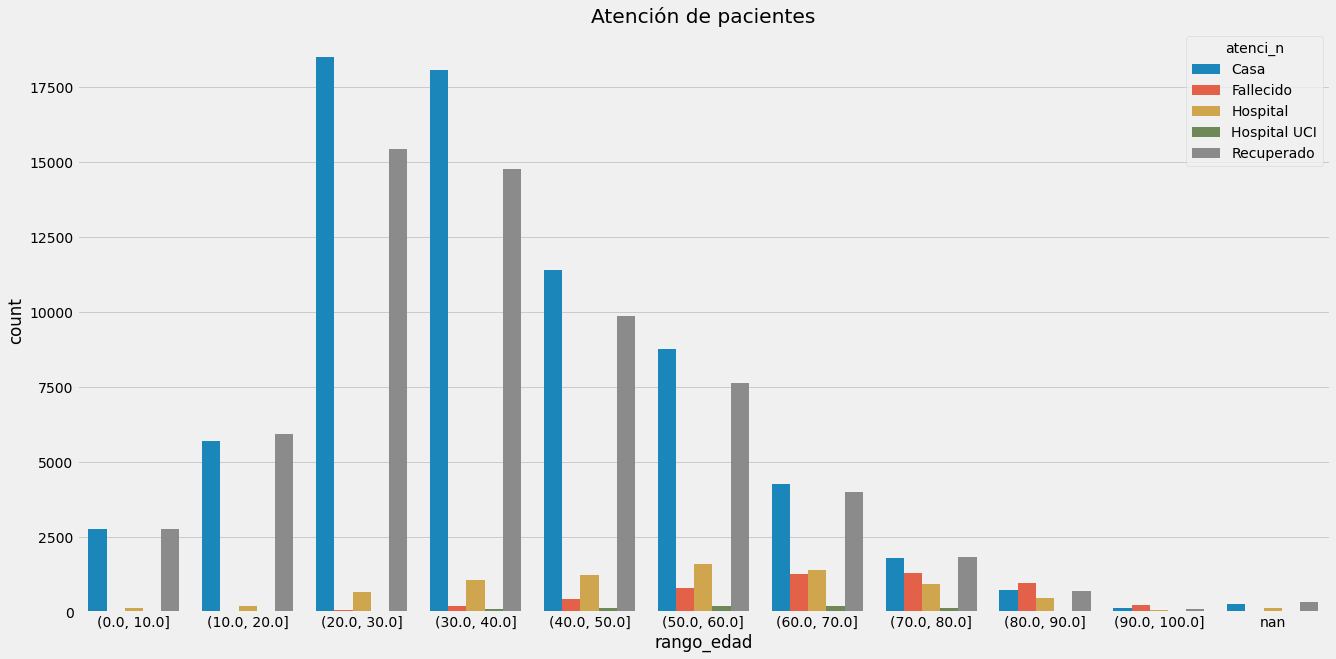

In [37]:
aux = df.groupby(["rango_edad", "atenci_n"])["atenci_n"].agg(["count"])
ex = aux.rename(columns={"atenci_n": "count"}).reset_index()
ex = ex.rename(columns={0: "count"})
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="atenci_n", 
                 data=ex[ex["atenci_n"].isin(["Recuperado", "Fallecido", "Hospital UCI", "Hospital", "Casa"])], ax=ax)
ax.set_title("Atención de pacientes")
plt.show()

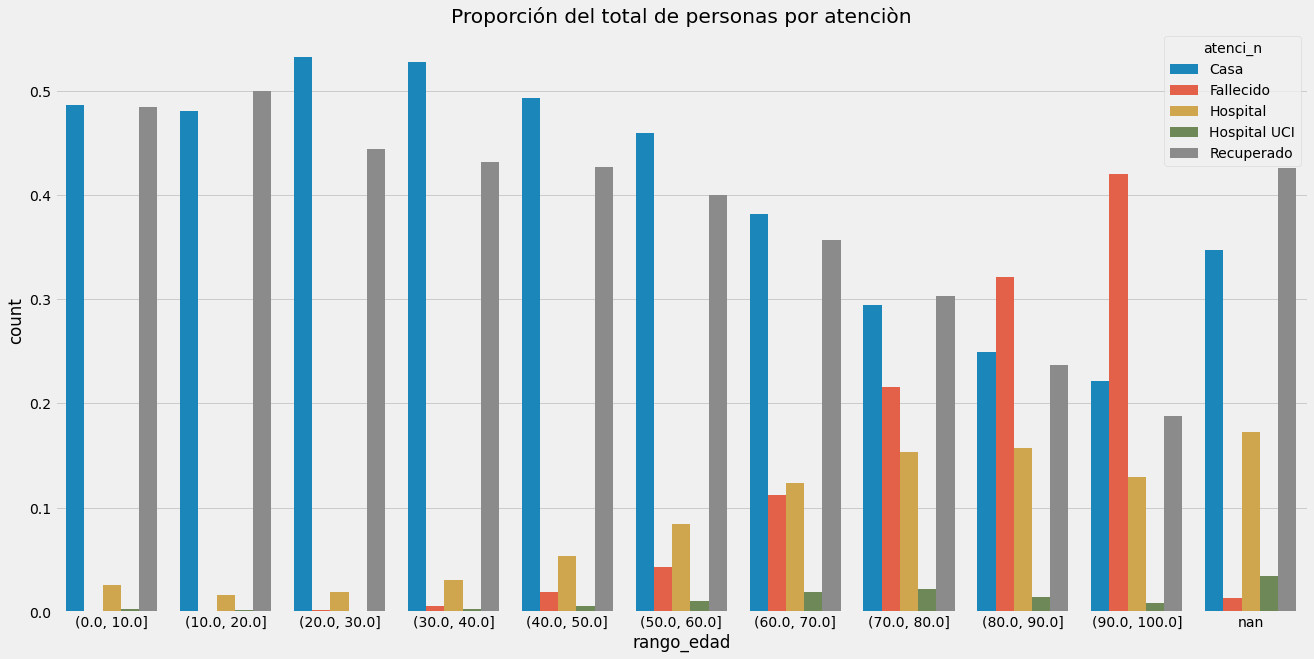

In [38]:
aux = df.groupby(["rango_edad", "atenci_n"])["atenci_n"].agg(["count"])
aux = aux.loc[:,:]/total_por_rango_de_edad
ex = aux.rename(columns={"atenci_n": "count"}).reset_index()
ex = ex.rename(columns={0: "count"})
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="atenci_n", 
                 data=ex[ex["atenci_n"].isin(["Recuperado", "Fallecido", "Hospital UCI", "Hospital", "Casa"])], ax=ax)
ax.set_title("Proporción del total de personas por atenciòn")
plt.show()

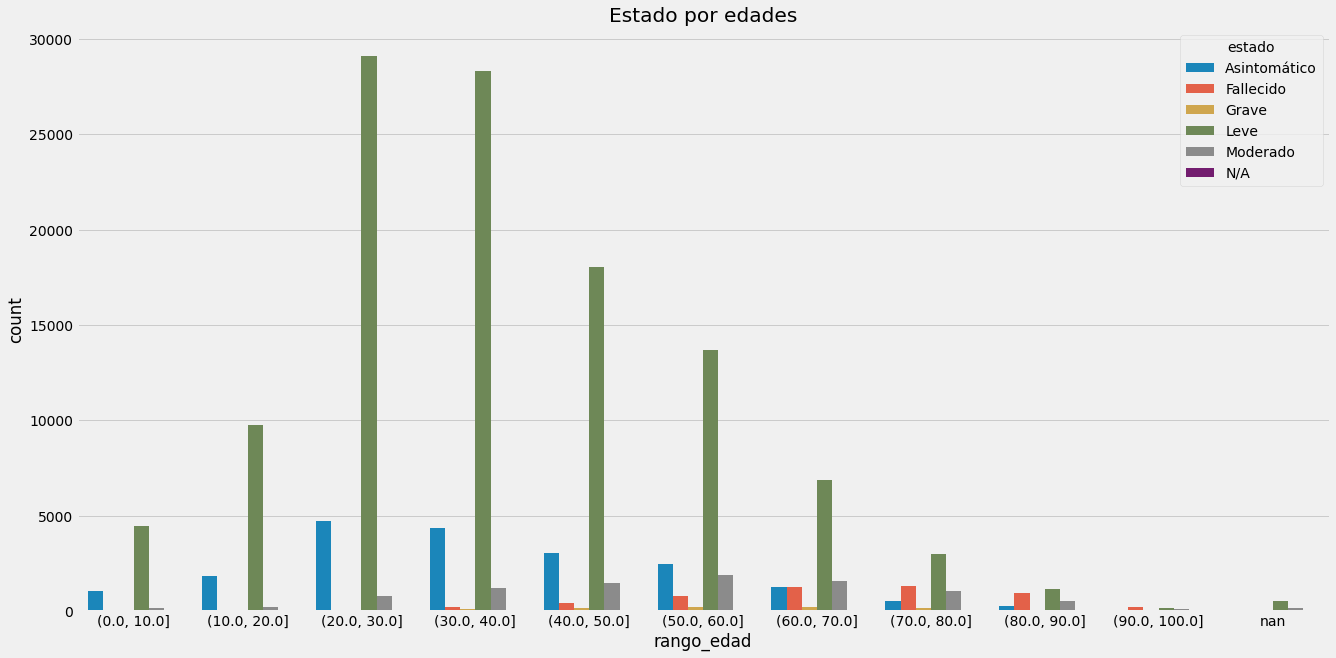

In [39]:
aux = df.groupby(["rango_edad", "estado"])["estado"].agg(["count"])
ex = aux.rename(columns={"estado": "count"}).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="estado", 
                 data=ex, ax=ax)
ax.set_title("Estado por edades")
plt.show()

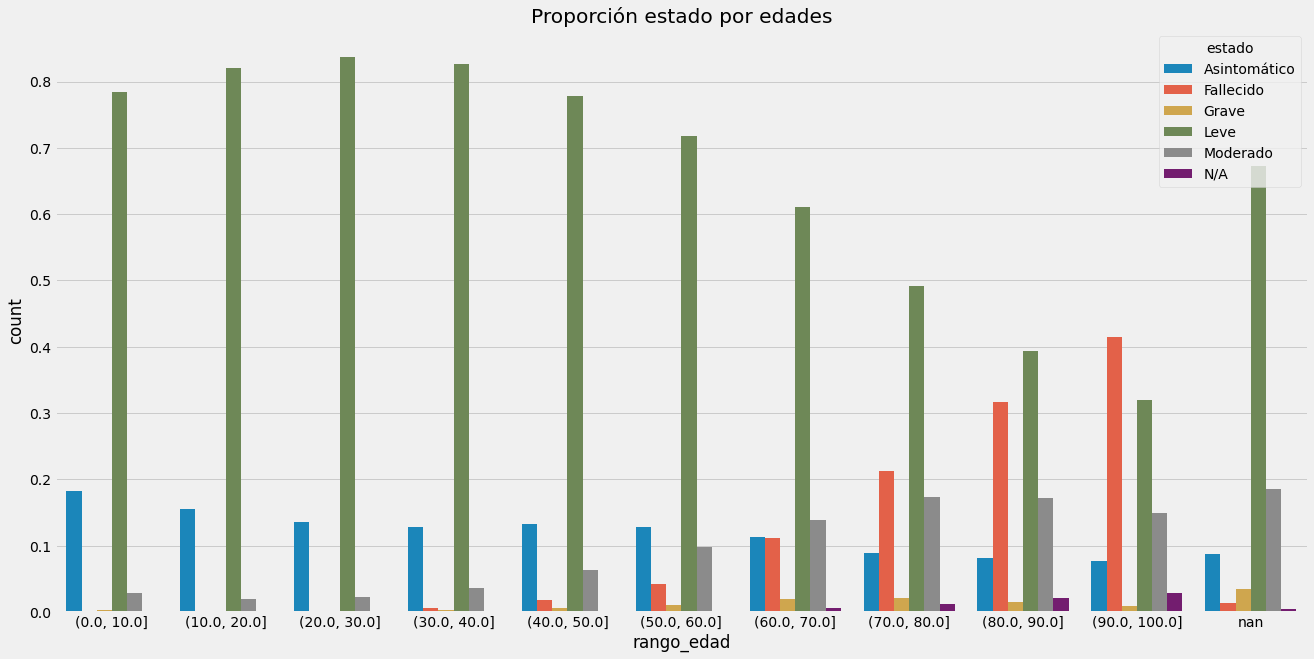

In [40]:
aux = df.groupby(["rango_edad", "estado"])["estado"].agg(["count"])
aux = aux.loc[:,:]/total_por_rango_de_edad
ex = aux.rename(columns={"estado": "count"}).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="estado", 
                 data=ex, ax=ax)
ax.set_title("Proporción estado por edades")
plt.show()